In [2]:
library(CBCgrps)
library(nortest)
library(RPostgreSQL)
library(twang)
library(Matching)
library(tidyverse)
library(ggplot2)
library(readxl)
library(tableone)

Loading required package: nortest

Warning message:
"package 'RPostgreSQL' was built under R version 4.3.3"
Loading required package: DBI

Warning message:
"package 'twang' was built under R version 4.3.3"
Warning message in .recacheSubclasses(def@className, def, env):
"undefined subclass "ndiMatrix" of class "replValueSp"; definition not updated"
To reproduce results from prior versions of the twang package, please see the version="legacy" option described in the documentation.

Warning message:
"package 'Matching' was built under R version 4.3.3"
Loading required package: MASS

## 
##  Matching (Version 4.10-14, Build Date: 2023-09-13)
##  See https://www.jsekhon.com for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##


Warning message:
"package 'tidyverse' was built un

In [1]:
data_dir <- file.path("..", "data")

In [3]:
data <- read_excel(file.path(data_dir, "baseline.xlsx"))

## 以下是对subgroup2的统计，是住院中的下降值

In [5]:
subgroup2 <- as.data.frame(readxl::read_excel(file.path(data_dir, "subgroup2.xlsx")))



In [6]:
model <- lm(TCM ~ PT + APTT + Accumulatedose +
       fib + DD + PLT + CK + CKMB, data = subgroup2)


In [8]:
coef_table <- summary(model)$coefficients
coef_table <- as.data.frame(coef_table)

In [9]:
# 计算95%置信区间
library(broom)
ci <- tidy(model, conf.int = TRUE) 

Warning message:
"package 'broom' was built under R version 4.3.3"


In [10]:
forest_data <- data.frame(
  Variable = rownames(coef_table),
  Estimate = coef_table[, "Estimate"],
  `Lower CI` = ci$conf.low,
  `Upper CI` = ci$conf.high,
  `P-value` = coef_table[, "Pr(>|t|)"]
)

forest_data

Variable,Estimate,Lower.CI,Upper.CI,P.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.388749e-01,7.600028e-01,9.177471e-01,5.398212e-60
PT,-1.743563e-03,-4.080567e-03,5.934415e-04,1.430832e-01
APTT,-9.390351e-04,-3.200690e-03,1.322620e-03,4.144985e-01
Accumulatedose,-4.332560e-04,-7.390188e-04,-1.274932e-04,5.639075e-03
fib,-1.965876e-02,-4.800693e-02,8.689411e-03,1.733504e-01
DD,7.828700e-04,-2.722475e-03,4.288214e-03,6.605829e-01
PLT,-6.387762e-04,-1.694912e-03,4.173602e-04,2.348660e-01
CK,-3.636689e-06,-5.327261e-05,4.599923e-05,8.854416e-01
CKMB,-1.351085e-05,-5.003093e-04,4.732877e-04,9.564747e-01


## 以下是对phase2的统计，是住院中的描述性分析

In [11]:
phase2 <- as.data.frame(readxl::read_excel(file.path(data_dir, "phase2.xlsx")))


In [12]:
model <- lm(TCM ~ PT + APTT + Accumulatedose +
       fib + DD + PLT + CK + CKMB, data = phase2)


In [13]:
coef_table <- summary(model)$coefficients
coef_table <- as.data.frame(coef_table)

In [14]:
# 计算95%置信区间
library(broom)
ci <- tidy(model, conf.int = TRUE) 

In [15]:
str(phase2)

'data.frame':	300 obs. of  22 variables:
 $ serum         : num  1 2 1 1 2 2 1 1 0 3 ...
 $ TCM           : num  1 1 1 1 1 1 0 1 1 1 ...
 $ hight         : num  1.55 1.68 1.55 1.72 1.58 1.55 1.73 1.75 1.58 1.73 ...
 $ IBM           : num  22.5 30.1 25.8 25.4 28 ...
 $ ALT           : num  13 25 17 12 38 29 260 28 14 11 ...
 $ AST           : num  16 20 75 14 68 25 78 19 16 17 ...
 $ AST1          : num  100 31 19 72 84 21 25 31 40 18 ...
 $ AKI           : num  0 0 1 0 1 0 1 0 0 0 ...
 $ complication  : num  0 0 1 1 2 1 1 0 1 0 ...
 $ GCs           : num  2 2 2 2 1 1 2 2 1 1 ...
 $ Accumulatedose: num  420 420 360 420 50 360 480 240 135 60 ...
 $ dose          : num  60 60 60 60 10 60 60 60 15 15 ...
 $ doseday       : num  7 7 6 7 5 6 8 4 9 4 ...
 $ los_hos       : num  8 7 6 7 6 6 8 4 9 4 ...
 $ PT            : num  10.8 12.1 10.1 10.3 10.4 10.5 10.1 10.2 10 11.1 ...
 $ APTT          : num  24.9 28 23.8 23.4 20.9 21.7 22.2 22 23.7 31.1 ...
 $ fib           : num  3.18 2.9 1.13 2.31 1

In [16]:
forest_data <- data.frame(
  Variable = rownames(coef_table),
  Estimate = coef_table[, "Estimate"],
  `Lower CI` = ci$conf.low,
  `Upper CI` = ci$conf.high,
  `P-value` = coef_table[, "Pr(>|t|)"]
)

forest_data



Variable,Estimate,Lower.CI,Upper.CI,P.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.7259843316,0.275805562,1.176163e+00,0.001664897
PT,0.0018140367,-0.004109262,7.737335e-03,0.547141398
APTT,0.0044586338,-0.012725866,2.164313e-02,0.609983581
Accumulatedose,-0.0003730467,-0.000681500,-6.459349e-05,0.017942378
fib,0.0159990790,-0.036901172,6.889933e-02,0.552142692
DD,-0.0252485660,-0.067036841,1.653971e-02,0.235346048
PLT,-0.0002154980,-0.000938389,5.073930e-04,0.557848734
CK,-0.0006381790,-0.001272109,-4.248579e-06,0.048494163
CKMB,0.0039190216,-0.001208258,9.046301e-03,0.133575921


In [18]:
subgroup3 <- as.data.frame(readxl::read_excel(file.path(data_dir, "subgroup3.xlsx")))

In [19]:
str(subgroup3)

'data.frame':	300 obs. of  26 variables:
 $ stay_id       : num  1 2 3 4 5 6 7 8 9 10 ...
 $ serum         : num  1 2 1 1 2 2 1 1 0 3 ...
 $ TCM           : num  1 1 1 1 1 1 0 1 1 1 ...
 $ hight         : num  1.55 1.68 1.55 1.72 1.58 1.55 1.73 1.75 1.58 1.73 ...
 $ IBM           : num  22.5 30.1 25.8 25.4 28 ...
 $ ALT           : num  13 25 17 12 38 29 260 28 14 11 ...
 $ AST           : num  16 20 75 14 68 25 78 19 16 17 ...
 $ AST1          : num  100 31 19 72 84 21 25 31 40 18 ...
 $ AKI           : num  0 0 1 0 1 0 1 0 0 0 ...
 $ complication  : num  0 0 1 1 2 1 1 0 1 0 ...
 $ GCs           : num  2 2 2 2 1 1 2 2 1 1 ...
 $ Accumulatedose: num  420 420 360 420 50 360 480 240 135 60 ...
 $ dose          : num  60 60 60 60 10 60 60 60 15 15 ...
 $ doseday       : num  7 7 6 7 5 6 8 4 9 4 ...
 $ los_hos       : num  8 7 6 7 6 6 8 4 9 4 ...
 $ PT            : num  -0.9 1.3 -1.8 -0.5 -109.6 ...
 $ APTT          : num  0.3 2.5 0.8 0.7 -3.6 ...
 $ fib           : num  0.6 1.11 0.93 -0.1

In [20]:
# los_hos
subgroup3$los_hos_group <- cut(subgroup3$los_hos, breaks = c(-Inf, 7, 9, Inf), 
                           labels = c("Short＜7", "Medium>=7, <9", "Long>=9"))
# 住院天数分组
subgroup3$los_hos_group <- cut(subgroup3$los_hos, breaks = c(-Inf, 7, 9, Inf), 
                           labels = c("Low＜7", "Medium>=7, <9", "High>=9"))

# PT分组 
subgroup3$PT_group <- cut(subgroup3$PT, breaks = c(-Inf, -0.8, -0.2, Inf), 
                         labels = c("Low＜-0.8", "Medium-0.8 to -0.2", "High＞-0.2"))

# APTT分组
subgroup3$APTT_group <- cut(subgroup3$APTT, breaks = c(-Inf, -2.7, -0.5, Inf),
                           labels = c("Low＜-2.7", "Medium-2.7 to -0.5", "High＞-0.5"))

# Fibrinogen分组
subgroup3$fib_group <- cut(subgroup3$fib, breaks = c(-Inf, -0.12, 0.69, Inf),
                          labels = c("Low＜-0.12", "Medium-0.12 to 0.69", "High＞0.69"))

# D-Dimer分组
subgroup3$DD_group <- cut(subgroup3$DD, breaks = c(-Inf, 0.05, 0.59, Inf),
                         labels = c("Low＜0.05", "Medium0.05 to 0.59", "High＞0.59"))

# 血小板分组
subgroup3$PLT_group <- cut(subgroup3$PLT, breaks = c(-Inf, 10, 85, Inf),
                          labels = c("Low＜10", "Medium10 to 85", "High＞85"))

# CK分组
subgroup3$CK_group <- cut(subgroup3$CK, breaks = c(-Inf, -96, -26.5, Inf),
                         labels = c("Low＜-96", "Medium-96 to -26.5", "High＞-26.5"))

# CK-MB分组 
subgroup3$CK_MB_group <- cut(subgroup3$CKMB, breaks = c(-Inf, -7.5, -3.3, Inf),
                            labels = c("Low＜-7.5", "Medium-7.5 to -3.3", "High＞-3.3"))

# 累计剂量分组
subgroup3$Accumulatedose_group <- cut(subgroup3$Accumulatedose, breaks = c(-Inf, 60, 360, Inf),
                                     labels = c("Low<60", "Medium 60 to 360", "High>360"))

In [21]:
 model <- glm(TCM ~ Accumulatedose_group + los_hos_group + PT_group + APTT_group + fib_group + DD_group + PLT_group + CK_group + CK_MB_group, data = subgroup3, family = "binomial")

Warning message:
"package 'forestmodel' was built under R version 4.3.3"


Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
"Unable to resize forest panel to be smaller than its heading; consider a smaller text size"


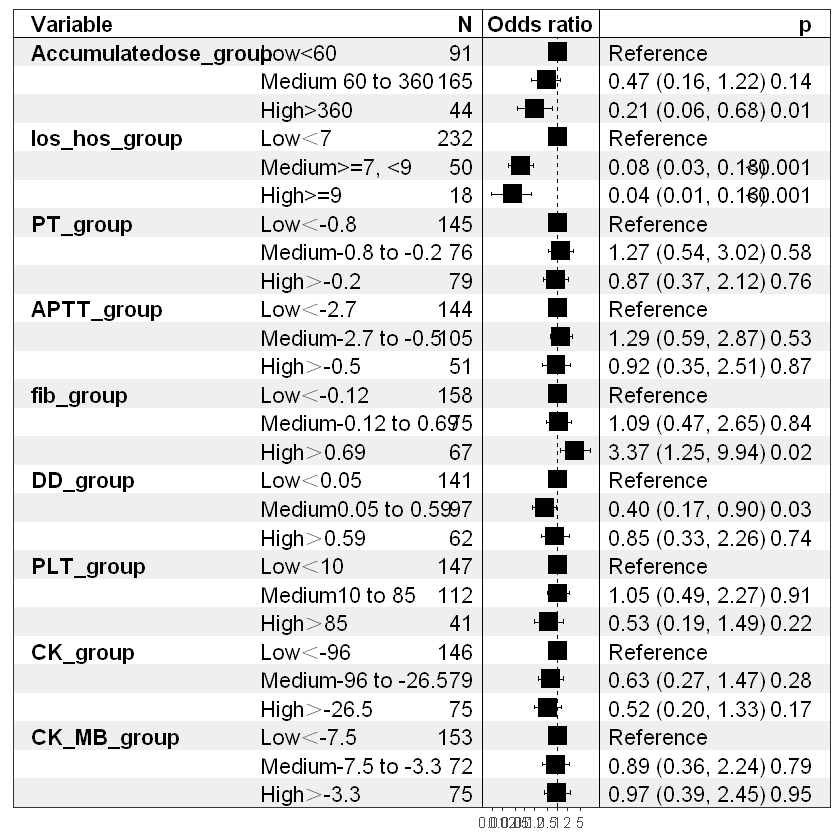

In [23]:
library(forestmodel)
forest_model(model)

In [24]:
summary(model)



Call:
glm(formula = TCM ~ Accumulatedose_group + los_hos_group + PT_group + 
    APTT_group + fib_group + DD_group + PLT_group + CK_group + 
    CK_MB_group, family = "binomial", data = subgroup3)

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           3.16785    0.66578   4.758 1.95e-06 ***
Accumulatedose_groupMedium 60 to 360 -0.74692    0.50570  -1.477   0.1397    
Accumulatedose_groupHigh>360         -1.56545    0.61507  -2.545   0.0109 *  
los_hos_groupMedium>=7, <9           -2.56483    0.44386  -5.778 7.54e-09 ***
los_hos_groupHigh>=9                 -3.14337    0.70913  -4.433 9.31e-06 ***
PT_groupMedium-0.8 to -0.2            0.23906    0.43432   0.550   0.5820    
PT_groupHigh＞-0.2                   -0.13515    0.44540  -0.303   0.7616    
APTT_groupMedium-2.7 to -0.5          0.25359    0.40221   0.630   0.5284    
APTT_groupHigh＞-0.5                 -0.07871    0.49867  -0.158   0.8746    
fib_group